In [88]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Helpful functions

In [89]:
def ecdf(data):
  n_data = len(data)
  x_data = np.sort(data)
  y_data = np.linspace(1/n_data, 1, n_data)
  return x_data, y_data

In [90]:
def get_airline_name(x):
  mtch = re.search("[a-z]+([A-Z])", str(x) )
  return x[mtch.span(1)[0]:] if mtch else ""


In [91]:
def get_location(x):
  mtch = re.search("[a-z]+([A-Z])", str(x) )
  return x[:mtch.span(1)[0]] if mtch else ""


In [92]:
def add(a,b):
    return int(a)+int(b)

In [93]:
sample = 'Miami, FloridaAmerican Airlines'
get_airline_name(sample)

'American Airlines'

In [94]:
get_location(sample)

'Miami, Florida'

In [95]:
def get_casualties(x):
  nums = re.findall("([0-9]+)", x)
  return nums[0] if nums else x

In [96]:
def get_passengers(x):
  nums = re.findall("([0-9]+)", x)
  return nums[1] if len(nums) > 1 else x

In [97]:
def get_ground_casualties(x):
  nums = re.findall("([0-9]+)", x)
  return nums[2] if len(nums) > 2 else x

In [98]:
text = '22/41(0)'
get_casualties(text)

'22'

In [99]:
get_passengers(text)

'41'

In [100]:
get_ground_casualties(text)

'0'

In [101]:
def get_aircraft_type(x):
  return x.rsplit(maxsplit=1)[0]

In [102]:
smpl = "Airbus A300-600RN14056"
get_aircraft_type(smpl)
smpl.rsplit(maxsplit=1)[0]

'Airbus'

# 1. Collect information for all Airplane crashes from 2000 to 2020

You might already have received a GitHub link to a csv file called "plane_crash_all.csv"

Access the data from this csv file and present its summary report :
- Number of data points [ or rows ]
- Number of features [ or columns ]
- First 10 entries in the dataset
- Last 10 entries in the dataset
- Datatypes of each column

In [103]:
df1 = pd.read_csv('plane_crash_all.csv')

In [104]:
#First 10 entries in the dataset 
df1

,Unnamed: 0,Date,Location / Operator,Aircraft Type / Registration,Fatalities
0,0,05 Jan 2000,"Abuja, NigeriaSkypower Express Airways",Embraer 110P1A Bandeirante5N-AXL,1/16(1)
1,1,10 Jan 2000,"Niederhasli, SwitzerlandCrossair",Saab 340BHB-AKK,10/10(0)
2,2,13 Jan 2000,"Off Marsa el-Brega, LibyaAvisto",Shorts 360-300HB-AAM,22/41(0)
3,3,15 Jan 2000,"San Jose, Costa RicaTACA",Let 410UVP-EYS-09-C,5/20(0)
4,4,30 Jan 2000,"Off Abidjan, Ivory CoastKenya Airways",AirbusA310-3045Y-BEN,169/179(0)
...,...,...,...,...,...
741,12,27 Dec 2019,"Almaty, KazakhstanBek Air",Fokker 100UP-F100,12/98(0)
742,0,02 Jan 2020,"Geneina, SudanSudanese Air Force",Antonov An12-A?,18/18(?)
743,1,08 Jan 2020,"Near Shahriah, IranUkraine International Airlines",Boeing 737-8KV WLUR-PSR,176/176(0)
744,2,05 Feb 2020,"Istanbul, TurkeyPegasus Airlines",Boeing 737-86JTC-IZK,3/177(0)


In [105]:
#Last 10 entries in the dataset
df1[10:]

,Unnamed: 0,Date,Location / Operator,Aircraft Type / Registration,Fatalities
10,10,17 Mar 2000,"Near Kuna Yala, PanamaAeroperlas",de Havilland Canada DHC-6 Twin Otter 300HP-126...,10/10(0)
11,11,17 Mar 2000,"Ennadai Lake, CanadaPoints North Air Services",Douglas C-47A-5-DKC-FNTF,2/2(0)
12,12,22 Mar 2000,"Herreira, SpainMilitary - Ejército del Aire",CASA 212-DE Aviocar 200TM-12D-73,7/7(0)
13,13,24 Mar 2000,"Kadirana, Sri LankaSky Cabs",Antonov AN-12 (freighter)RA-11302,6/8(2)
14,14,25 Mar 2000,"Huambo, AngolaUralex",Antonov AN-32D2-MAJ,3/33(0)
...,...,...,...,...,...
741,12,27 Dec 2019,"Almaty, KazakhstanBek Air",Fokker 100UP-F100,12/98(0)
742,0,02 Jan 2020,"Geneina, SudanSudanese Air Force",Antonov An12-A?,18/18(?)
743,1,08 Jan 2020,"Near Shahriah, IranUkraine International Airlines",Boeing 737-8KV WLUR-PSR,176/176(0)
744,2,05 Feb 2020,"Istanbul, TurkeyPegasus Airlines",Boeing 737-86JTC-IZK,3/177(0)


In [106]:
#To know the shape of the data (In this data frame Rows = 746,columns = 4)
df1.shape

(746, 5)

In [107]:
#To know the columns name in the data frame
df1.columns

Index(['Unnamed: 0', 'Date', 'Location / Operator',
       'Aircraft Type / Registration', 'Fatalities'],
      dtype='object')

In [108]:
#Datatypes of each column
df1.dtypes

Unnamed: 0                       int64
Date                            object
Location / Operator             object
Aircraft Type / Registration    object
Fatalities                      object
dtype: object

In [109]:
df1.head()

,Unnamed: 0,Date,Location / Operator,Aircraft Type / Registration,Fatalities
0,0,05 Jan 2000,"Abuja, NigeriaSkypower Express Airways",Embraer 110P1A Bandeirante5N-AXL,1/16(1)
1,1,10 Jan 2000,"Niederhasli, SwitzerlandCrossair",Saab 340BHB-AKK,10/10(0)
2,2,13 Jan 2000,"Off Marsa el-Brega, LibyaAvisto",Shorts 360-300HB-AAM,22/41(0)
3,3,15 Jan 2000,"San Jose, Costa RicaTACA",Let 410UVP-EYS-09-C,5/20(0)
4,4,30 Jan 2000,"Off Abidjan, Ivory CoastKenya Airways",AirbusA310-3045Y-BEN,169/179(0)


In [110]:
df1 = df1.drop(['Unnamed: 0'], axis=1)

# 2. Clean the data and arrange it into a DataFrame that contains the following columns

- Day [ Day of the month ]
- Month
- Year
- Location
- Operator
- Aircraft Type
- Total Passengers
- Casualties
- Ground Casualties

Make sure each column contains data with its appropriate datatype.

To study more details about what each field in the HTML represents, you can read through this sample data at : http://www.planecrashinfo.com/2014/2014-15.htm

In [111]:
#Making list of Each  coluumns
data1 = df1['Date'].tolist()
data2 = df1['Location / Operator'].tolist()
data3 = df1['Aircraft Type / Registration'].tolist()
data4 = df1['Fatalities'].tolist()

In [112]:
#Extracting the reqired data from the list and appending in to new list
Day = []
Month = []
Year = []
for i in data1:
    splt = i.split(' ')
    day = Day.append(splt[0])
    mont = Month.append(splt[1])
    year = Year.append(splt[2])

In [113]:
#Extracting the reqired data from the list and appending in to new list
Location = []
Operator = []
for i in data2:
    locn = get_location(i)
    locn = Location.append(locn)
    opt = get_airline_name(i)
    opt = Operator.append(opt)

In [114]:
#Extracting the reqired data from the list and appending in to new list
Aircraft_Type = []
for i in data3:
    air_typ = get_aircraft_type(i)
    aor_typ = Aircraft_Type.append(air_typ)

In [115]:
#Extracting the reqired data from the list and appending in to new list
Total_Passengers = []
Casualties = []
Ground_Casualties = []
for i in data4:
    pasn = get_passengers(i)
    pasn = int(pasn)
    pasn = Total_Passengers.append(pasn)
    casu = get_casualties(i)
    casu = int(casu)
    casu = Casualties.append(casu)
    gcas = get_ground_casualties(i)
    if len(gcas) < 5:
        gcas = int(gcas)
        gcas = Ground_Casualties.append(gcas)
    elif len(gcas) > 5:
        gcas = 0
        gcas = Ground_Casualties.append(gcas)

In [116]:
df = pd.DataFrame({'Day' : Day,
                   'Month' : Month,
                   'Year' : Year,
                   'Location' : Location,
                   'Operator' : Operator,
                   'Aircraft Type' : Aircraft_Type,
                   'Total Passengers' : Total_Passengers,
                   'Casualties' : Casualties,
                   'Ground Casualties' : Ground_Casualties
                  })

In [117]:
Total_Casualties = []
for i in range(0, len(Casualties)): 
    Total_Casualties.append(add(Casualties[i], Ground_Casualties[i]))

In [118]:
df['Total Casualties'] = Total_Casualties

In [119]:
df

,Day,Month,Year,Location,Operator,Aircraft Type,Total Passengers,Casualties,Ground Casualties,Total Casualties
0,05,Jan,2000,"Abuja, Nigeria",Skypower Express Airways,Embraer 110P1A,16,1,1,2
1,10,Jan,2000,"Niederhasli, Switzerland",Crossair,Saab,10,10,0,10
2,13,Jan,2000,"Off Marsa el-Brega, Libya",Avisto,Shorts,41,22,0,22
3,15,Jan,2000,"San Jose, Costa Rica",TACA,Let,20,5,0,5
4,30,Jan,2000,"Off Abidjan, Ivory Coast",Kenya Airways,AirbusA310-3045Y-BEN,179,169,0,169
...,...,...,...,...,...,...,...,...,...,...
741,27,Dec,2019,"Almaty, Kazakhstan",Bek Air,Fokker,98,12,0,12
742,02,Jan,2020,"Geneina, Sudan",Sudanese Air Force,Antonov,18,18,0,18
743,08,Jan,2020,"Near Shahriah, Iran",Ukraine International Airlines,Boeing 737-8KV,176,176,0,176
744,05,Feb,2020,"Istanbul, Turkey",Pegasus Airlines,Boeing,177,3,0,3


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Day                746 non-null    object
 1   Month              746 non-null    object
 2   Year               746 non-null    object
 3   Location           746 non-null    object
 4   Operator           746 non-null    object
 5   Aircraft Type      746 non-null    object
 6   Total Passengers   746 non-null    int64 
 7   Casualties         746 non-null    int64 
 8   Ground Casualties  746 non-null    int64 
 9   Total Casualties   746 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 40.9+ KB


# 3. Display a graph for number of crashes every year

- Do you see any trend ?
- Has airplane transportation become any safer over the last 20 years ?





Year
2000    63
2001    58
2002    55
2003    62
2004    46
2005    45
2006    38
2007    43
2008    51
2009    46
2010    40
2011    36
2012    26
2013    25
2014    23
2015    18
2016    23
2017    15
2018    16
2019    13
2020     4
Name: Casualties, dtype: int64

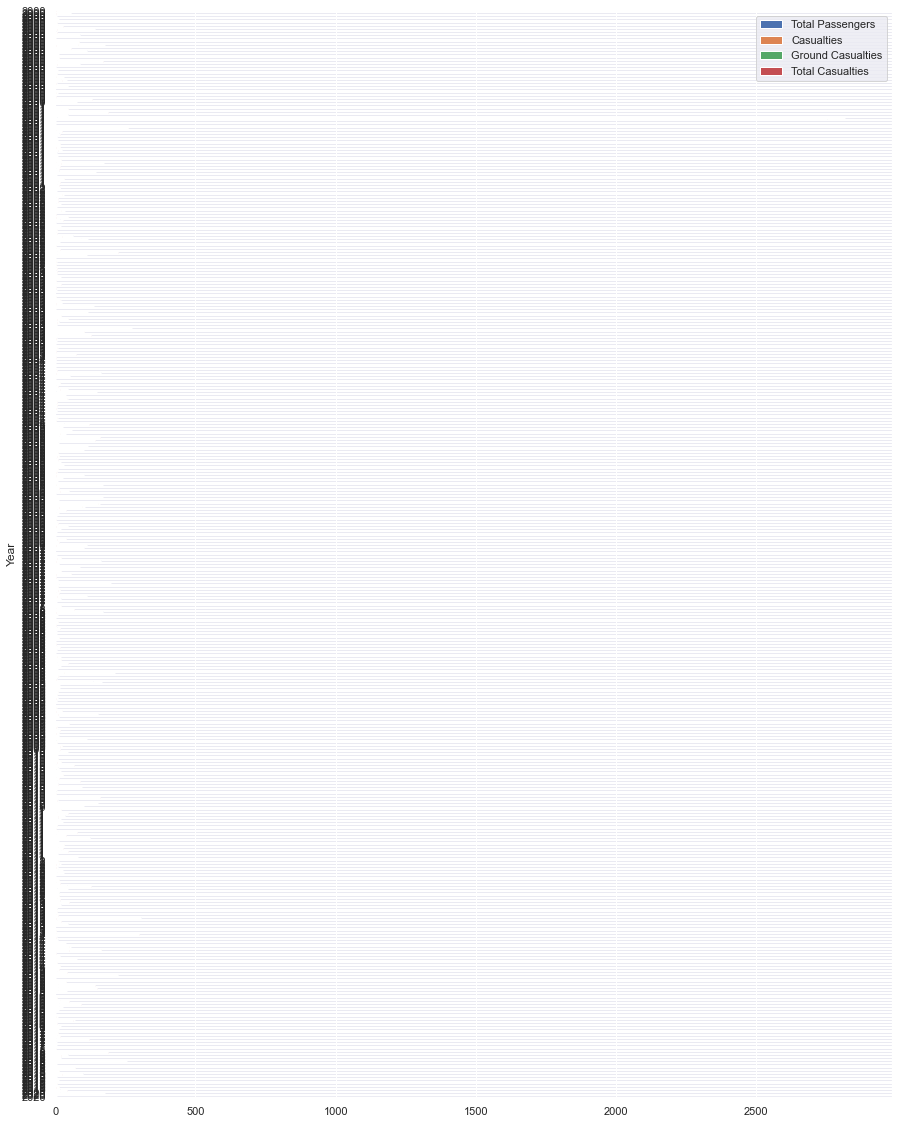

In [143]:
crash =df.groupby('Year').count()
df.set_index('Year').sort_index(ascending=False).plot( kind='barh', figsize=(15, 20))
crash =df.groupby('Year').count()
crash['Casualties']
#crash['Casualties']

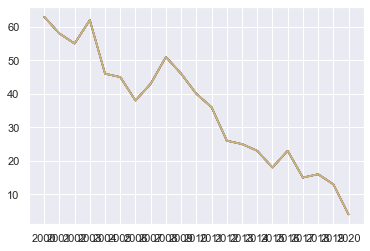

In [144]:
plt.plot(crash)
plt.show()

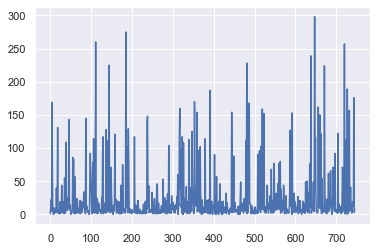

In [121]:
_ = df['Casualties'].plot()

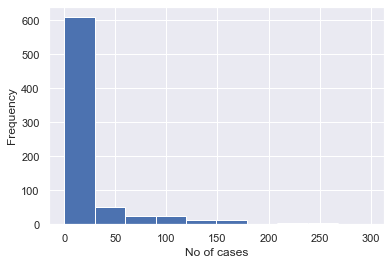

In [122]:
sns.set()

_ = df['Casualties'].plot(kind='hist')

_ = plt.xlabel('No of cases')
_ = plt.ylabel('Frequency')

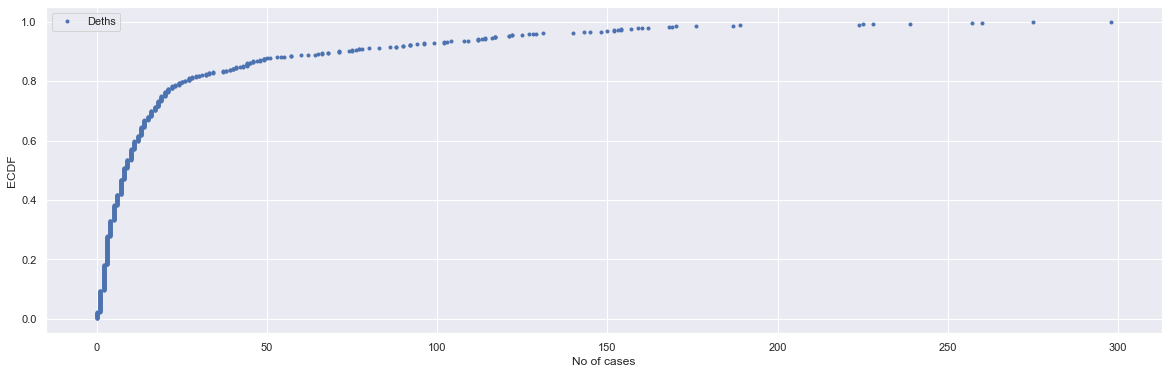

In [123]:
plt.figure(figsize=(20, 6))
x_vals, y_vals = ecdf(df['Casualties'])

plt.plot(x_vals, y_vals, marker='.', ls='none', label="Deths")

_ = plt.xlabel('No of cases')
_ = plt.ylabel('ECDF')
plt.legend()

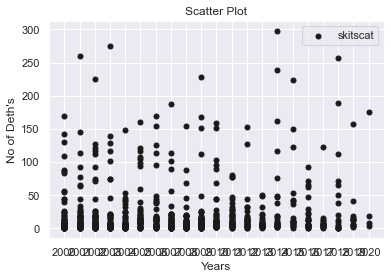

In [124]:
x = df['Year']
y = df['Casualties']
plt.scatter(x,y, label='skitscat',color='k',s=25, marker = 'o')

plt.xlabel('Years')
plt.ylabel("No of Deth's")

plt.title('Scatter Plot')
plt.legend()
#plt.grid(True,color='k')
plt.show()

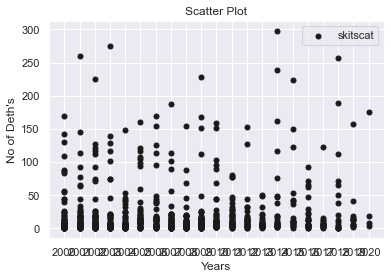

In [125]:
x = df['Year']
y = df['Casualties']
plt.scatter(x,y, label='skitscat',color='k',s=25, marker = 'o')

plt.xlabel('Years')
plt.ylabel("No of Deth's")

plt.title('Scatter Plot')
plt.legend()
#plt.grid(True,color='k')
plt.show()

In [126]:
top_case = df.groupby('Year')
top_case['Casualties']

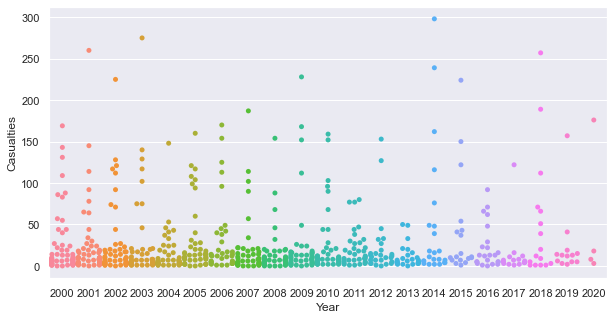

In [127]:
plt.figure(figsize=(10, 5))
_ = sns.swarmplot(x='Year', y='Casualties', data=df)

In [128]:
mask = df['Casualties'] > 0
No_of_deths = df[mask]
No_of_deths

,Day,Month,Year,Location,Operator,Aircraft Type,Total Passengers,Casualties,Ground Casualties,Total Casualties
0,05,Jan,2000,"Abuja, Nigeria",Skypower Express Airways,Embraer 110P1A,16,1,1,2
1,10,Jan,2000,"Niederhasli, Switzerland",Crossair,Saab,10,10,0,10
2,13,Jan,2000,"Off Marsa el-Brega, Libya",Avisto,Shorts,41,22,0,22
3,15,Jan,2000,"San Jose, Costa Rica",TACA,Let,20,5,0,5
4,30,Jan,2000,"Off Abidjan, Ivory Coast",Kenya Airways,AirbusA310-3045Y-BEN,179,169,0,169
...,...,...,...,...,...,...,...,...,...,...
741,27,Dec,2019,"Almaty, Kazakhstan",Bek Air,Fokker,98,12,0,12
742,02,Jan,2020,"Geneina, Sudan",Sudanese Air Force,Antonov,18,18,0,18
743,08,Jan,2020,"Near Shahriah, Iran",Ukraine International Airlines,Boeing 737-8KV,176,176,0,176
744,05,Feb,2020,"Istanbul, Turkey",Pegasus Airlines,Boeing,177,3,0,3


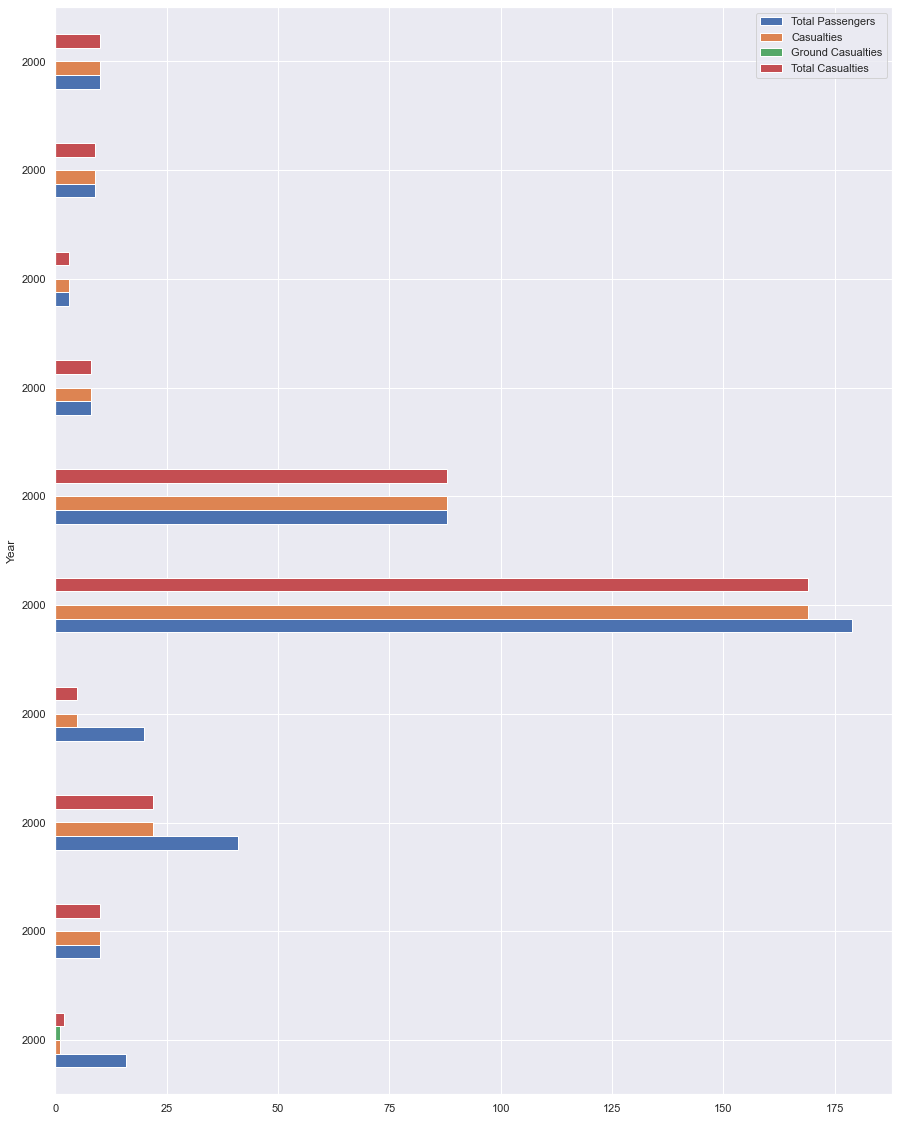

In [129]:
No_of_deths[:10].set_index('Year').sort_index(ascending=False).plot( kind='barh', figsize=(15, 20))

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Day                746 non-null    object
 1   Month              746 non-null    object
 2   Year               746 non-null    object
 3   Location           746 non-null    object
 4   Operator           746 non-null    object
 5   Aircraft Type      746 non-null    object
 6   Total Passengers   746 non-null    int64 
 7   Casualties         746 non-null    int64 
 8   Ground Casualties  746 non-null    int64 
 9   Total Casualties   746 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 40.9+ KB


In [131]:
df

,Day,Month,Year,Location,Operator,Aircraft Type,Total Passengers,Casualties,Ground Casualties,Total Casualties
0,05,Jan,2000,"Abuja, Nigeria",Skypower Express Airways,Embraer 110P1A,16,1,1,2
1,10,Jan,2000,"Niederhasli, Switzerland",Crossair,Saab,10,10,0,10
2,13,Jan,2000,"Off Marsa el-Brega, Libya",Avisto,Shorts,41,22,0,22
3,15,Jan,2000,"San Jose, Costa Rica",TACA,Let,20,5,0,5
4,30,Jan,2000,"Off Abidjan, Ivory Coast",Kenya Airways,AirbusA310-3045Y-BEN,179,169,0,169
...,...,...,...,...,...,...,...,...,...,...
741,27,Dec,2019,"Almaty, Kazakhstan",Bek Air,Fokker,98,12,0,12
742,02,Jan,2020,"Geneina, Sudan",Sudanese Air Force,Antonov,18,18,0,18
743,08,Jan,2020,"Near Shahriah, Iran",Ukraine International Airlines,Boeing 737-8KV,176,176,0,176
744,05,Feb,2020,"Istanbul, Turkey",Pegasus Airlines,Boeing,177,3,0,3


# 4. Display in a graph month-wise report of deaths

- Are there any trends or patterns that you see in this data ?
- Which are the top 3 months with the highest  deaths on an average ?
- Which are the top 3 months with the least  deaths on an average?

## 5. Report the casualties among passengers and the ground for every year

- Has air travel become any safer over these years ?
- Are there any specific months where the casualties are usually less ?
- Which are the top 3 months, that reported the most number of casualties ?

# 6. Display in a graph the number of crashes for every year that happened for Airbus

- Which were the best 3 years for Airbus ?
- Which were the worst 3 years for Airbus ?

# 7. Cessna is one of the smallest aircrafts. Analyse the trends of casualties, both among passengers and on the ground for this aircraft

- Do you see any improvement in its safety for travel ?

# 8. Find out the top 5 aircrafts that have had the least number of crashes and can thus be considered relatively safe to travel in